In [11]:
from datasets import load_dataset, DatasetDict, Dataset
from transformers import (
    AutoTokenizer,
    AutoConfig,
    DistilBertModel,
    DistilBertTokenizer,
    
    AutoModelForSequenceClassification,
    DataCollatorWithPadding,
    TrainingArguments,
    Trainer
)
from torch.utils.data import DataLoader

import torch
import numpy as np
import numpy as np

# Load model and tokenizer
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import torch
from tqdm import tqdm
from utils.distilbert_nn import *

# Setting up the device for GPU usage
from torch import cuda
device = 'cuda' if cuda.is_available() else 'cpu'

device


'cuda'

In [3]:

# Load and combine the datasets
dataset = load_dataset("csv", data_files="./data/2019_1.csv")#data_files)

# Filter and split the dataset
df  = dataset['train'].filter(
    lambda example: example['headline'] is not None and example['headline'].strip() != ''
)#.train_test_split(test_size=0.1)

# Display the resulting dataset
df 

Dataset({
    features: ['id', 'date_publish', 'outlet', 'headline', 'lead', 'body', 'authors', 'domain', 'url', 'political_leaning'],
    num_rows: 162993
})

In [4]:
# Creating the customized model, by adding a drop out and a dense layer on top of distil bert to get the final output for the model.
model_checkpoint = 'distilbert-base-uncased'

#Define label maps
id2label = {0:"UNDEFINED" ,1:"LEFT",2:"RIGHT",3:"CENTER"}
label2id = {"UNDEFINED": 0, "LEFT": 1, "RIGHT": 2, "CENTER": 3}

tokenizer = get_tokenizer_pretrained_model()

model = DistillBERTClass()
model.load_state_dict(torch.load("./models/local_run_BERT_body_v4/best_model.pt"))
model.to(device)

C:\Users\ALEJANDRO\AppData\Local\Temp\ipykernel_11748\3117944612.py:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("./models/local_run_BE

DistillBERTClass(
  (l1): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): DistilBertSdpaAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
            (lin1): Linear(

In [5]:
# Tokenize the data
test_dataset = Triage(df, tokenizer, max_length=512)
data_collator = DataCollatorWithPadding(tokenizer=get_tokenizer_pretrained_model())

# Test DataLoader
test_loader = DataLoader(
    test_dataset,
    batch_size=10,
    shuffle=False,
    collate_fn=data_collator,
)

In [6]:
# Make predictions for each row in the dataset
accuracy, precision, recall, f1, results_df = test_model(model, test_loader, device)

  0%|          | 0/16300 [00:00<?, ?it/s]c:\Users\ALEJANDRO\Documents\7. DUKE\1. ECE 684 - NLP\Assignments\Final Project\venv_lda_implementation\Lib\site-packages\transformers\tokenization_utils_base.py:2857: UserWarning: Though `pad_to_max_length` = `True`, it is ignored because `padding`=`True`.
  warnings.warn("Though `pad_to_max_length` = `True`, it is ignored because `padding`=`True`.")
100%|██████████| 16300/16300 [1:18:29<00:00,  3.46it/s]
c:\Users\ALEJANDRO\Documents\7. DUKE\1. ECE 684 - NLP\Assignments\Final Project\venv_lda_implementation\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Test Results
------------------------------
Accuracy: 0.4162
Precision: 0.3328
Recall: 0.4162
F1-score: 0.3610


In [7]:
results_df.to_csv("./results/local_run_BERT_body_v4.csv")

In [9]:
# File to save the metrics
file_path = "metrics_output.txt"

# Write metrics to the file
with open(file_path, "w") as file:
    file.write(f"Accuracy: {accuracy}\n")
    file.write(f"Precision: {precision}\n")
    file.write(f"Recall: {recall}\n")
    file.write(f"F1 Score: {f1}\n")


# *LoRA*

In [ ]:

# Load and combine the datasets
dataset = load_dataset("csv", data_files="./data/2019_1.csv")#data_files)

# Filter and split the dataset
df  = dataset['train'].filter(
    lambda example: example['headline'] is not None and example['headline'].strip() != ''
).train_test_split(test_size=0.3)

# Display the resulting dataset
df 

DatasetDict({
    train: Dataset({
        features: ['id', 'date_publish', 'outlet', 'headline', 'lead', 'body', 'authors', 'domain', 'url', 'political_leaning'],
        num_rows: 132046
    })
    test: Dataset({
        features: ['id', 'date_publish', 'outlet', 'headline', 'lead', 'body', 'authors', 'domain', 'url', 'political_leaning'],
        num_rows: 14672
    })
})

In [4]:
model_checkpoint = 'distilbert-base-uncased'

#Define label maps
id2label = {0:"UNDEFINED" ,1:"LEFT",2:"RIGHT",3:"CENTER"}
label2id = {"UNDEFINED": 0, "LEFT": 1, "RIGHT": 2, "CENTER": 3}

model = AutoModelForSequenceClassification.from_pretrained(
    model_checkpoint, num_labels=4, id2label=id2label, label2id=label2id)
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint, add_prefix=True)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [5]:
from peft import LoraConfig, get_peft_model

# Recreate LoRA configuration
peft_config = LoraConfig(
    task_type="SEQ_CLS", r=4, lora_alpha=32, lora_dropout=0.01, target_modules=["q_lin"]
)

# Apply LoRA configuration
base_model = AutoModelForSequenceClassification.from_pretrained(model_checkpoint, num_labels=4, id2label=id2label, label2id=label2id)
model = get_peft_model(base_model, peft_config)

# Load LoRA adapter weights
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.load_state_dict(torch.load(r"C:\Users\ALEJANDRO\Documents\7. DUKE\1. ECE 684 - NLP\Assignments\Final Project\models\LORA_distilBERT_BODY_2017_1.pth", map_location=device), strict=False)
model.to(device)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\ALEJANDRO\AppData\Local\Temp\ipykernel_12728\2917286397.py:14: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unles

PeftModelForSequenceClassification(
  (base_model): LoraModel(
    (model): DistilBertForSequenceClassification(
      (distilbert): DistilBertModel(
        (embeddings): Embeddings(
          (word_embeddings): Embedding(30522, 768, padding_idx=0)
          (position_embeddings): Embedding(512, 768)
          (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (dropout): Dropout(p=0.1, inplace=False)
        )
        (transformer): Transformer(
          (layer): ModuleList(
            (0-5): 6 x TransformerBlock(
              (attention): DistilBertSdpaAttention(
                (dropout): Dropout(p=0.1, inplace=False)
                (q_lin): lora.Linear(
                  (base_layer): Linear(in_features=768, out_features=768, bias=True)
                  (lora_dropout): ModuleDict(
                    (default): Dropout(p=0.01, inplace=False)
                  )
                  (lora_A): ModuleDict(
                    (default): Linear(in_features=7

In [6]:
# Initialize a list to store the predictions
predictions_list = []

# Make predictions for each row in the dataset
model.eval()
with torch.no_grad():
    for text in tqdm(df['test']):
        inputs = tokenizer.encode(text['body'], return_tensors="pt", padding=True, truncation=True, max_length=512).to(device)
        logits = model(inputs).logits
        predictions = torch.argmax(logits, dim=1).item()  # Get the predicted class label
        predictions_list.append(predictions)

# Add the predictions as a new column to the dataset

  0%|          | 0/14672 [00:00<?, ?it/s]

100%|██████████| 14672/14672 [09:28<00:00, 25.81it/s]


In [8]:
df = df['test'].add_column('predictions', predictions_list)

Flattening the indices:   0%|          | 0/14672 [00:00<?, ? examples/s]

In [12]:
# Extract true labels and predicted labels
true_labels = df['political_leaning']
predicted_labels = [id2label[pred] for pred in df['predictions']]#df['predictions'].map(label2id)

# Compute accuracy, recall, F1 score
accuracy = accuracy_score(true_labels, predicted_labels)
recall = recall_score(true_labels, predicted_labels, average='weighted')  # Weighted for multi-class
precision = precision_score(true_labels, predicted_labels, average='weighted')
f1 = f1_score(true_labels, predicted_labels, average='weighted')  # Weighted for multi-class

print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")


Accuracy: 0.9071
Recall: 0.9071
Precision: 0.9080
F1 Score: 0.9065


In [16]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import pandas as pd

# Extract true labels and predicted labels
true_labels = pd.Series(df['political_leaning'])  # Convert to pandas Series
predicted_labels = pd.Series([id2label[pred] for pred in df['predictions']])  # Convert predictions to a Pandas Series

# Compute global accuracy
accuracy = accuracy_score(true_labels, predicted_labels)

# Compute recall, precision, and F1 score for each class (not averaged)
recall = recall_score(true_labels, predicted_labels, average=None)  # Recall for each class
precision = precision_score(true_labels, predicted_labels, average=None)  # Precision for each class
f1 = f1_score(true_labels, predicted_labels, average=None)  # F1 Score for each class

# Print results
print(f"Accuracy (Global): {accuracy:.4f}")

# Compute and print accuracy for each class
unique_labels = sorted(true_labels.unique())
print("\nAccuracy for each class:")
for label in unique_labels:
    class_mask = (true_labels == label)
    correct_predictions = (true_labels[class_mask] == predicted_labels[class_mask]).sum()
    class_accuracy = correct_predictions / class_mask.sum()  # Accuracy for this class
    print(f"{label}: {class_accuracy:.4f}")

print("\nRecall for each class:")
for idx, label in enumerate(unique_labels):
    print(f"{label}: {recall[idx]:.4f}")

print("\nPrecision for each class:")
for idx, label in enumerate(unique_labels):
    print(f"{label}: {precision[idx]:.4f}")

print("\nF1 Score for each class:")
for idx, label in enumerate(unique_labels):
    print(f"{label}: {f1[idx]:.4f}")


Accuracy (Global): 0.9071

Accuracy for each class:
CENTER: 0.9218
LEFT: 0.9321
RIGHT: 0.7758
UNDEFINED: 0.9197

Recall for each class:
CENTER: 0.9218
LEFT: 0.9321
RIGHT: 0.7758
UNDEFINED: 0.9197

Precision for each class:
CENTER: 0.8866
LEFT: 0.8995
RIGHT: 0.9291
UNDEFINED: 0.9338

F1 Score for each class:
CENTER: 0.9039
LEFT: 0.9155
RIGHT: 0.8456
UNDEFINED: 0.9267


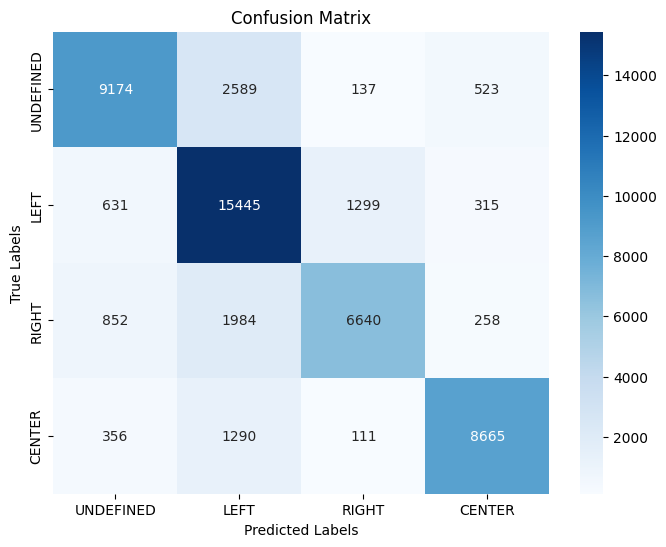

In [23]:
# Compute confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=id2label.values(), yticklabels=id2label.values())
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()
